# Bike Sharing Analysis with Ford GoBike Data
## by Omar Hegazy

## Investigation Overview

In this presentation, I want to look into the charactaristics and behaviors in the relationship between customers and subscribers from gender age and time and how they behave with the service.
## Dataset Overview

Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. The system was originally launched as Bay Area Bike Share in August 2013. At launch, it became the first regional bicycle sharing system deployed on the West Coast of the United States and also the first regional system in the U.S.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgo_master2018_cl.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,duration_min,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,2018-01-31,22,Wednesday,January,1254.733333,34.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,2018-01-31,16,Wednesday,January,1423.700000,NaN
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,2018-01-31,14,Wednesday,January,1192.933333,24.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,2018-01-31,14,Wednesday,January,1017.933333,NaN
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,2018-01-31,19,Wednesday,January,666.100000,29.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  start_date               object 
 17  start_hour               int64  
 18  start_day                object 
 19  start_month              object 
 20  duration_min             float64
 21  member_a

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The difference in trip duration between genders and user types

In this visualization we see that Female tend to have longer trip duration than male. and customers tend to have also longer trip duration with high difference with subscribers.

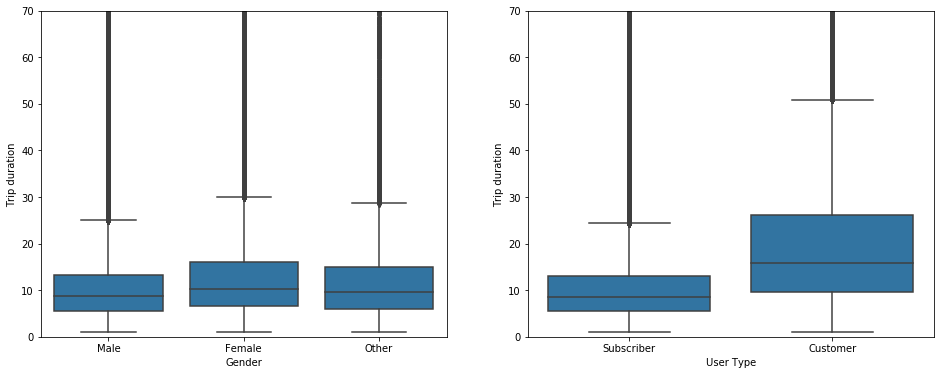

In [24]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1);
sb.boxplot(data=df, x='member_gender', y='duration_min', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip duration');
plt.ylim(0,70);
plt.subplot(1, 2, 2); 
sb.boxplot(data=df, x='user_type', y='duration_min', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Trip duration');
plt.ylim(0,70);

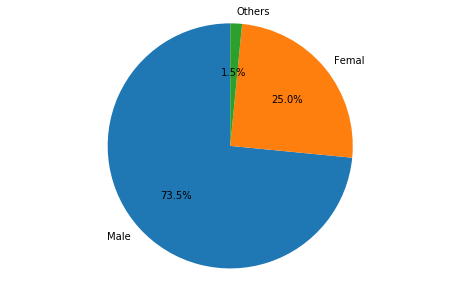

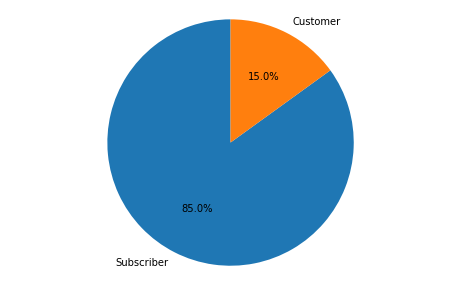

In [29]:

labels = 'Male', 'Femal', 'Others'
sizes = [15, 30, 45, 10]
fig1, ax1 = plt.subplots()
ax1.pie(df.member_gender.value_counts(), labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
labels = 'Subscriber', 'Customer'
sizes = [15, 30, 45, 10]
fig1, ax1 = plt.subplots()
ax1.pie(df.user_type.value_counts(), labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Difference in times using the service between genders and user types

observation is number of subscribers is much more than number of customers and reaches its peak in 8 am and 17 pm probably because it is times of going to work and going home and also in working days the differnce is much high as for the month the diffrence stays very high and become much more in summer month and reaches the peak in october. For genders males are much more in numbers than female and the number reaches the peak at 17pm as for females there number reaches its peak at 8 am.

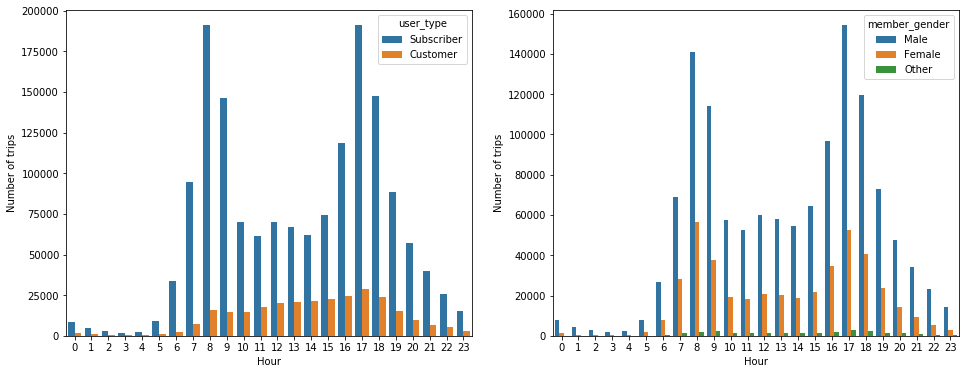

In [21]:
plt.figure(figsize=[16, 6]);
plt.subplot(1, 2, 1);
sb.countplot(data=df, x='start_hour', hue='user_type');
plt.xlabel('Hour');
plt.ylabel('Number of trips');
plt.subplot(1, 2, 2);
sb.countplot(data=df, x='start_hour', hue='member_gender');
plt.xlabel('Hour');
plt.ylabel('Number of trips');

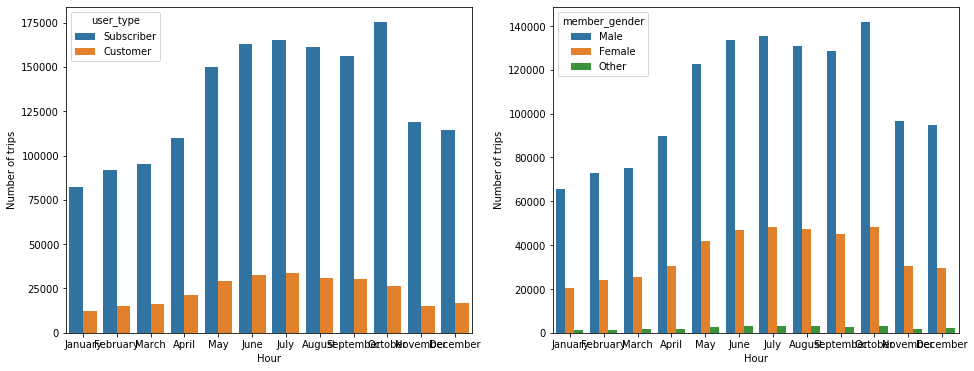

In [22]:
plt.figure(figsize=[16, 6]);
plt.subplot(1, 2, 1);
sb.countplot(data=df, x='start_month', hue='user_type');
plt.xlabel('Hour');
plt.ylabel('Number of trips');
plt.subplot(1, 2, 2);
sb.countplot(data=df, x='start_month', hue='member_gender');
plt.xlabel('Hour');
plt.ylabel('Number of trips');

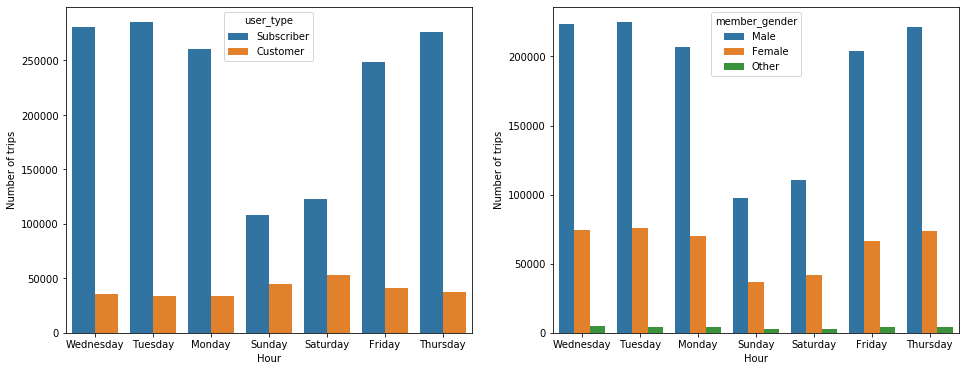

In [23]:
plt.figure(figsize=[16, 6]);
plt.subplot(1, 2, 1);
sb.countplot(data=df, x='start_day', hue='user_type');
plt.xlabel('Hour');
plt.ylabel('Number of trips');
plt.subplot(1, 2, 2);
sb.countplot(data=df, x='start_day', hue='member_gender');
plt.xlabel('Hour');
plt.ylabel('Number of trips');

## Heat Map
The heat map proves my last observations the subscribers are using the servies heavily in the work days from monday to friday and the work hours from 8am to 17 and not using it alot in other times that suggests that they are commuters. as for customers the are using the service heavily from 7am to 18 pm and specially in saterday and sunday. and that suggests that they are tourists or visitor having good time.



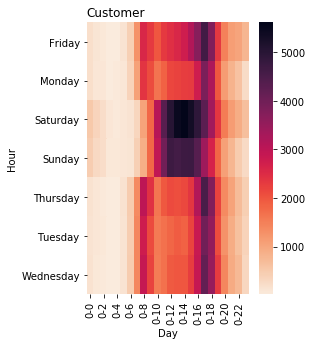

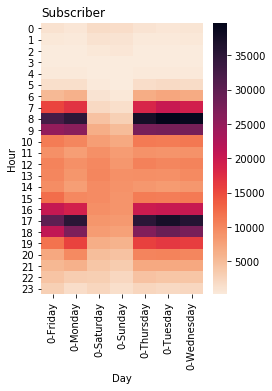

In [31]:
plt.subplot(1, 2, 1)

customer = df.query('user_type == "Customer"')
customer = customer.groupby(['start_day', 'start_hour']).size()
customer = customer.reset_index();
customer = customer.pivot('start_day', 'start_hour')
sb.heatmap(customer, cmap='rocket_r');
plt.title('Customer', loc='left')
plt.xlabel('Day')
plt.ylabel('Hour')


plt.show()
plt.subplot(1, 2, 2)
subscriber = df.query('user_type == "Subscriber"')
subscriber = subscriber.groupby(['start_hour', 'start_day']).size()
subscriber = subscriber.reset_index();
subscriber = subscriber.pivot('start_hour', 'start_day')
sb.heatmap(subscriber, cmap = 'rocket_r')

plt.title("Subscriber", loc='left')
plt.xlabel('Day')
plt.ylabel('Hour');

plt.show()

## Conclusion
Most of the riders are males and males are quiker than females they take shorter trip duration. most of the users are subscriber and commuters there primary usage is for work. They are also quiker in comparison with Customers. they are tourists, visitors or citizens who love riding bikes and take much longer time in their trip duration.